SMO（Sequential Minimal Optimization）算法是一种用于求解支持向量机（Support Vector Machine，SVM）的优化算法。它的思路是通过将大规模优化问题分解为多个较小的子问题来求解，每次选取两个变量进行优化，从而逐步更新模型的参数。

SMO算法的基本思路如下：

1、初始化：首先，选择一组初始的参数向量和偏置项，并定义一组训练数据集。通常，初始的参数向量可以设置为零向量，偏置项可以设置为零。

2、选择变量：在每次迭代中，选择两个变量进行优化。选择的标准可以是使得目标函数有最大变化的两个变量，也可以根据一些启发式的方法进行选择。

3、优化变量：选择两个变量后，通过求解两个变量的最优解来优化目标函数。这个最优化问题可以通过解析求解或者使用数值优化算法（如二次规划）来处理。

4、更新参数：在找到两个变量的最优解后，更新模型的参数向量和偏置项。更新的方式依赖于具体的优化问题和算法。

5、终止条件：重复执行步骤2至步骤4，直到满足某个终止条件。终止条件可以是达到最大迭代次数、目标函数收敛等。

SMO算法通过反复执行选择变量、优化变量和更新参数的步骤，逐步逼近优化问题的最优解。这种分解的方法使得SMO算法可以高效地求解大规模的优化问题，并且每次只需要选择两个变量进行优化，大大降低了计算的复杂度。

# Algerian_forest_fires_dataset数据集预处理
把缺失值处理好、label换成1和-1、从数据集中选取两列属性来进行后续训练、把处理好的训练集放在testSetRBF.txt中 测试集放在testSetRBF2.txt中。

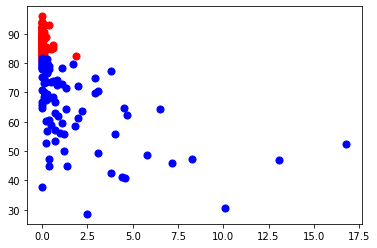

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Algerian_forest_fires_dataset_fix.csv',skiprows=[0,124,125,126])
data.fillna(0, inplace=True)
# 使用 loc 和 str.contains 选择包含 "not" 的行，将该列的值替换成 0
data.loc[data['Classes  '].str.contains('not'), 'Classes  '] = -1

# 将该列中其他行的值替换成 1
data.loc[data['Classes  '] != -1, 'Classes  '] = 1


# 提取第六列、第七列和最后一列
extracted_data = data.iloc[:, [6, 7, -1]]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(extracted_data.iloc[:, :-1], extracted_data.iloc[:, -1], test_size=0.2, random_state=42)

# 将训练集和测试集合并
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# 将数据保存到txt文件
train_data.to_csv('testSetRBF.txt', index=False, header=False, sep=',')
test_data.to_csv('testSetRBF2.txt', index=False, header=False, sep=',')


filename = 'testSetRBF.txt'
fr = open(filename)
X1 = [];y1 = []
X2 = [];y2 = []
for line in fr.readlines():
    lineArr = line.strip().split(',')
    if float(lineArr[-1]) == 1:

        X1.append(float(lineArr[0]))
        y1.append(float(lineArr[1]))
    elif float(lineArr[-1]) == -1:
        X2.append(float(lineArr[0]))
        y2.append(float(lineArr[1]))   

# 使用matplotlib来绘制点图
plt.scatter(X1[:],y1[:],c='r',s=50)
plt.scatter(X2[:],y2[:],c='b',s=50)
plt.show()


# 定义数据读取

In [55]:
'''
Created on Nov 4, 2010
Chapter 5 source file for Machine Learing in Action
@author: Peter
'''
from numpy import *
from time import sleep

def loadDataSet(fileName): 
#加载数据集。参数fileName为数据集文件名，返回值为一个包含数据和标签的列表。
    dataMat = []; labelMat = [] # 初始化数据集和标签列表为空
    fr = open(fileName) # 打开数据文件
    for line in fr.readlines(): # 对数据文件的每一行进行遍历
        lineArr = line.strip().split(',') # 将当前行按制表符分割成一个列表
        dataMat.append([float(lineArr[0]), float(lineArr[1])]) # 将前两个元素作为样本属性加入数
        labelMat.append(float(lineArr[2])) # 将第三个元素作为样本标签加入标签列表
    return dataMat,labelMat # 返回包含数据和标签的列表


# 随机选择J
selectJrand函数根据i，选择与i不同的角标作为另一个alpha的角标.

In [56]:

def selectJrand(i,m): 
    """
    随机选择一个整数
    Args:
        i  第一个alpha的下标
        m  所有alpha的数目
    Returns:
        j  返回一个不为i的随机数，在0~m之间的整数值
    """
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j # 返回选取的随机数j



# 调整Alpha
根据不同的yi，调整alphaj的范围，使其在H和L之间.

In [57]:

def clipAlpha(aj,H,L): 
    """clipAlpha(调整aj的值，使aj处于 L<=aj<=H)
    Args:
        aj  目标值
        H   最大值
        L   最小值
    Returns:
        aj  目标值
    """
    if aj > H: 
        aj = H  # 如果a_j大于H，则将aj调整为H
    if L > aj:
        aj = L  # 如果a_j小于L，则将aj调整为L
    return aj



In [58]:


def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    """
    SMO算法的实现。
    参数分别为：
        dataMatIn    数据集
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率（是指在某个体系中能减小一些因素或选择对某个系统产生不稳定的概率。）
        maxIter 退出前最大的循环次数
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子。
        
    该函数中的主要实现是迭代训练。
    每次迭代中，遍历所有样本点，对每个样本点α_i进行检查是否满足KKT条件，
    如果不满足，则选择另一个样本点α_j，通过优化α_i和α_j来使得分类器的性能得到提升。
    如果所有样本点都满足KKT条件，则迭代结束。
    每次迭代都会打印当前迭代次数和更新的α对数。
    在整个训练过程中，如果在优化中出现问题，如L=H或eta>=0，则直接跳过本次循环。

    """
    dataMatrix = mat(dataMatIn) 
    # 矩阵转置 和 .T 一样的功能
    labelMat = mat(classLabels).transpose() # 转换为矩阵
    
    m,n = shape(dataMatrix)  # 获取数据集的大小，m表示数据集中样本的个数，n表示特征的数量
    # 初始化 b和alphas(alpha有点类似权重值。)
    b = 0; 
    alphas = mat(zeros((m,1))) # 初始化拉格朗日乘子α向量
    
    # 没有任何alpha改变的情况下遍历数据的次数
    iter = 0  # 初始化迭代次数
    while (iter < maxIter): 
        # w = calcWs(alphas, dataMatIn, classLabels)
        # print("w:", w)
        # 记录alpha是否已经进行优化，每次循环时设为0，然后再对整个集合顺序遍历 
        alphaPairsChanged = 0    # 初始化每次迭代中优化的α对数
        for i in range(m):  # 遍历数据集中所有的样本点
            # 我们预测的类别 y = w^Tx[i]+b; 其中因为 w = Σ(1~n) a[n]*lable[n]*x[n]
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b # 计算样本点i的预测值f(x_i)
            # 预测结果与真实结果比对，计算误差Ei
            Ei = fXi - float(labelMat[i])  # 计算样本点i的误差Ei
            
            # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
            # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
            # 表示发生错误的概率: labelMat[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
            '''
            # 检验训练样本(xi, yi)是否满足KKT条件
            yi*f(i) >= 1 and alpha = 0 (outside the boundary)
            yi*f(i) == 1 and 0<alpha< C (on the boundary)
            yi*f(i) <= 1 and alpha = C (between the boundary)
            '''
            
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                # 如果满足优化的条件，我们就随机选取非i的一个点，进行优化比较
                j = selectJrand(i,m)    # 随机选择一个不等于i的样本点j
                # 预测j的结果
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b  # 计算样本点j的预测值
                Ej = fXj - float(labelMat[j]) # 计算样本点j的误差Ei
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy(); #保存alphas的旧值
                # 保证 alpha_i 和 alpha_j 在 [0,C] 范围内
                
                # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接执行continue语句
                # labelMat[i] != labelMat[j] 表示异侧，就相减，否则是同侧，就相加。
                if (labelMat[i] != labelMat[j]): #根据两个样本的类别标签计算alpha的上下限L和H
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                # 如果相同，就没发优化了
                if L==H: print("L==H"); continue  #如果上限和下限相等，则跳过本次循环
                #计算eta，即两个样本的核函数值
                
                
                # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue #如果eta>=0，跳过本次循环
                
                # 计算出一个新的alphas[j]值
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta #更新alpha_j
                
                # 并使用辅助函数，以及L和H对其进行调整
                alphas[j] = clipAlpha(alphas[j],H,L)
                
                # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue  # 如果 alpha_j 变化不大，就跳过此次循环
                
                # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
                # w= Σ[1~n] ai*yi*xi => b = yj- Σ[1~n] ai*yi(xi*xj)
                # 所以:   b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
                # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍   
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #根据更新后的alpha值，计算更新后的偏差b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1 #计算更新的alpha值的数量
                print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)) #打印迭代次数，当前更新的alpha值对应的样本编号，和更新的alpha值的数量。
        
        # 在for循环外，检查alpha值是否做了更新，如果在更新则将iter设为0后继续运行程序
        # 知道更新完毕后，iter次循环无变化，才推出循环。
        if (alphaPairsChanged == 0): iter += 1  
        else: iter = 0
        print("iteration number: %d" % iter)
    return b,alphas


# 转换核函数
线性核、高斯核

In [59]:

def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    #核函数转换部分，用于计算数据点之间的相似度，根据指定的核函数，计算或将数据转换到更高维度的空间
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel  # 指定的核函数为线性核
    elif kTup[0]=='rbf':  # 指定的核函数为【高斯核】
        for j in range(m): # 对于每个数据点X[j]
            deltaRow = X[j,:] - A # 计算数据点X[j]与参考点A之间的欧几里得距离
            K[j] = deltaRow*deltaRow.T # 将距离平方存储在K[j]中
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab # 对K中的每个元素应用高斯核函数，计算K的值
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized') # 如果指定的核函数未被识别，则抛出NameError异常
    return K  # 返回计算出的K矩阵

# 数据结构
为了算法的一致性与简洁性，这里定义了数据结构,之后的函数调用都采用以上的数据结构，从而提高了效率.

In [60]:

class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels  # 数据标签
        self.C = C  # 软间隔惩罚参数
        self.tol = toler # 停止条件的容忍度
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))  # 拉格朗日乘子向量
        self.b = 0  # 偏置量
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))  # 核函数矩阵
        for i in range(self.m):
             # 填充核函数矩阵
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
     

# 计算误差E
这里根据公式E = f(xi) - yi ，负责计算误差E.

In [61]:
def calcEk(oS, k):
     # 计算第k个样本点的预测值fXk
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    # 计算第k个样本点的预测误差Ek
    Ek = fXk - float(oS.labelMat[k])
    return Ek
    

# 根据最大误差选取J
直观来看，KKT条件违背的程度越大，则更新变量更新后可能导致的目标函数增幅越大，所以SMO算法先选取违背KKT条件最大的变量，第二个变量的选择一个使目标函数值增长最快的变量。这里SMO采用了一种启发式，是选取的两个变量所对应的样本的间隔最大，一种直观的解释，这样的两个变量有很大的区别，与对两个相似变量更新相比，对他们更新会使目标函数值发生更大的变化.（参考西瓜书）

In [62]:
    
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    #这是第二种选择，启发式，计算Ej
    maxK = -1; maxDeltaE = 0; Ej = 0 #初始化变量
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        ## 如果缓存误差有多于一个有效值，则循环遍历这些值以找到使得差异最大的样本点j
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek #更新
        return maxK, Ej # 返回使得差异最大的样本点j以及其预测误差Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
   # 返回样本点j以及其预测误差Ej
    return j, Ej


# 更新误差E
在alpha更新后，其相对应的误差E也基于更新的alpha重新计算.

In [63]:
def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    ## 计算样本点k的新的预测误差Ek并更新到缓存中
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]

# SMO算法
SMO算法又称序列最小优化，是John Platt发布的的一种训练SVM的强大算法，SMO算法的思想是将大的优化问题转换为多个小优化问题，这些小的优化往往很容易求解，并且对他们进行顺序求解和作为整体求解的结果是完全一致的。SMO算法的目标是求出一些列alpha和b，一旦求出alpha，我们的超平面w的系数便得到，我们就可以利用超平面来进行分类了。SMO算法的思想是将大的优化问题转换为多个小优化问题，这些小的优化往往很容易求解，并且对他们进行顺序求解和作为整体求解的结果是完全一致的。SMO算法的目标是求出一些列alpha和b，一旦求出alpha，我们的超平面w的系数便得到，我们就可以利用超平面来进行分类了。

SMO算法的工作原理是每次循环中选择两个alpha进行优化，先选择一个αi，然后固定αi之外的其他参数，求αi上的极值，由于存在零和约束，所以修改αi时，我们也需要修改一个αj，所以我们选择两个变量αi，αj进行优化，并固定其他参数，在参数初始化后，SMO不断执行下列两个步骤直到收敛：

·选取一对需要更新的αi，αj

·固定αi，αj之外的参数，求解获得新的αi，αj

首先在不满足KKT条件的集合中选取αi，αj，其次SMO采取了一种启发式，使选取的两变量对应的间隔越大越好，直观的解释是，这两个变量有很大的差别，与对两个相似的变量进行更新对比，对他们更新会带给目标函数值更大的变化。

In [64]:
def innerL(i, oS):
    Ei = calcEk(oS, i) # 计算样本 i 的误差
    
    # 判断样本 i 是否可以被优化
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand # 选择第二个变量 j，并计算 j 的误差
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy(); # 备份更新前的 alpha 值
        if (oS.labelMat[i] != oS.labelMat[j]): # 计算 alpha[j] 的上下界 L 和 H
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print("L==H"); return 0    # 若上下界相等，则直接返回
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel # 根据选择的 alpha[i] 和 alpha[j]，计算优化的步长 eta
        if eta >= 0: print("eta>=0"); return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta  # 更新 alpha[j] 的值，并将其限制在上下界之间
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache  # 更新 j 的误差缓存
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); return 0 # 判断 alpha[j] 是否有足够的变化量
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j # 更新 alpha[i] 的值，方向与 alpha[j] 相反
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]  # 更新 b 值
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0


# 核函数选择并计算参数alpha，b
根据输入的数据集，标签，松弛因子C，容忍度toler，最大迭代数与核函数参数，运行完整的SMO算法，直到更新达到一定条件（达到迭代最大次数，更新程度达到一定变化范围），停止迭代，返回参数alpha，b.

In [65]:

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    """
    这个函数的作用是实现了Platt SMO算法的一部分，
    用于求解支持向量机（SVM）的最优解。
    具体来说，该函数通过不断调整SVM模型的参数alpha和截距b，来最小化分类误差和最大化间隔。
    最终返回SVM模型的最优截距b和最优的alpha值。

    """
    # 创建一个optStruct对象，其中包含SMO所需的所有信息
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    # 初始化循环所需的一些变量
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all #遍历所有的数据点
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print("fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#go over non-bound (railed) alphas  #遍历所有的数据点
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print("non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
         # 切换遍历的数据集
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print("iteration number: %d" % iter) # 打印迭代次数
    return oS.b,oS.alphas  # 返回最优的b和alphas


# 计算系数W
通过上一个函数返回的alpha，b，通过拉格朗日法推出的w公式，计算w

In [66]:

def calcWs(alphas,dataArr,classLabels):
    """
    基于alpha计算w值
    Args:
        alphas        拉格朗日乘子
        dataArr       feature数据集
        classLabels   目标变量数据集

    Returns:
        wc  回归系数
    """
    # 将数据和标签转换为矩阵
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X) #获取数据集的行和列数
    w = zeros((n,1)) #初始化权重矩阵为0
    for i in range(m): #遍历所有样本
        # 根据α和标签计算权重向量w
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w


# Non-Kernel VErsions below  非内核版本


In [67]:

'''#######********************************
Non-Kernel VErsions below  以下非内核版本
'''#######********************************

class optStructK:
    def __init__(self,dataMatIn, classLabels, C, toler):  # Initialize the structure with the parameters 
        self.X = dataMatIn # 训练数据集矩阵
        self.labelMat = classLabels # 类别标签矩阵
        self.C = C # 惩罚参数
        self.tol = toler # 容错率
        self.m = shape(dataMatIn)[0] # 训练数据集的样本数
        self.alphas = mat(zeros((self.m,1))) # 存储每个样本的拉格朗日乘子
        self.b = 0 # 存储模型的偏置值
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag # 存储模型的偏置值
        
def calcEkK(oS, k):
    # 计算第k个样本的预测值与真实值之间的误差
    fXk = float(multiply(oS.alphas,oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJK(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    # 选择第二个样本的拉格朗日乘子alphaj
    maxK = -1; maxDeltaE = 0; Ej = 0
     # 将第i个样本的误差值存入缓存
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0] # 找出所有已经存储了误差值的样本
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time # 忽略i
            Ek = calcEk(oS, k) # 计算第k个样本的预测误差
            deltaE = abs(Ei - Ek) # 计算误差差值
            if (deltaE > maxDeltaE): # 找到误差差值最大的样本
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m) # 随机选择一个样本
        Ej = calcEk(oS, j) # 计算随机选择的样本的预测误差
    return j, Ej

def updateEkK(oS, k):#after any alpha has changed update the new value in the cache
# 在拉格朗日乘子变化后，更新第k个样本的误差值
    Ek = calcEk(oS, k) # 重新计算第k个样本的预测误差
    oS.eCache[k] = [1,Ek] # 更新第k个样本的误差值
        
def innerLK(i, oS):
    Ei = calcEk(oS, i)  # 计算样本i的预测误差
    # 判断alpha[i]是否违反KKT条件
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand # 选择第二个alpha，保证在每次优化中采用最大步长
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();  # 复制alpha[i]的值 # 复制alpha[i]的值
         # 计算L和H用于将alpha[j]调整到可行域中
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print("L==H"); return 0 
        eta = 2.0 * oS.X[i,:]*oS.X[j,:].T - oS.X[i,:]*oS.X[i,:].T - oS.X[j,:]*oS.X[j,:].T
        if eta >= 0: print("eta>=0"); return 0
        # 更新alpha[j]
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        # 将alpha[j]调整到可行域中
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache # 更新误差缓存
        # 如果alpha[j]的变化很小，则返回0
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        # 计算b1和b2，用于更新b
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoPK(dataMatIn, classLabels, C, toler, maxIter):    #full Platt SMO
    """
    输入参数：dataMatIn-数据集，classLabels-标签集，C-惩罚参数，toler-容错率，maxIter-最大迭代次数
    返回值：oS.b-模型的截距，oS.alphas-模型的拉格朗日乘子向量

    """
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler) #创建一个optStruct对象oS
    iter = 0 #初始化迭代次数iter、entireSet和alphaPairsChanged
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)): #当迭代次数小于最大迭代次数且alpha对有变化或者entireSet为真时，进入循环
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS) #遍历每一个数据点，使用innerL函数进行优化
                #输出迭代次数iter、数据点i和优化的alpha对数量alphaPairsChanged
                print("fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#go over non-bound (railed) alphas #如果entireSet为假，则遍历非边界的alpha对
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0] #找出非边界alpha对的索引
            for i in nonBoundIs: #遍历每一个非边界alpha对，使用innerL函数进行优化，并统计优化的alpha对数量alphaPairsChanged
                alphaPairsChanged += innerL(i,oS)
                print("non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)) #输出迭代次数iter、数据点i和优化的alpha对数量alphaPairsChanged
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print("iteration number: %d" % iter)
    return oS.b,oS.alphas

# 测试函数
这里选择参数sigma=2，rbf 高斯核函数对之前的线性不可分点进行分类，根据预测标签与真实标签的判别，计算分类的错误率.

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
def testRbf(k1=1.3):
    # 加载数据集和标签
    dataArr,labelArr = loadDataSet('testSetRBF.txt')
    
    # 调用SMO算法获取b和α
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', k1)) #C=200 important
    
    # 将数据和标签转换为矩阵
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
     # 找到支持向量的索引
    svInd=nonzero(alphas.A>0)[0]
    # 获取仅包含支持向量的矩阵
    sVs=datMat[svInd] #get matrix of only support vectors
    # 获取仅包含支持向量标签的矩阵
    labelSV = labelMat[svInd];
    # # 打印支持向量的数量
    # print("there are %d Support Vectors" % shape(sVs)[0])
    
    m,n = shape(datMat) #获取数据集的行和列数
    errorCount = 0 #初始化错误分类的样本数为0
    for i in range(m): #遍历所有样本
        # 计算测试样本与支持向量之间的高斯核
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        # 根据支持向量、α和偏置项b计算测试样本的预测值
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        # 如果测试样本的预测值与真实标签不一致，则错误分类数加1
        
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    # 打印训练集上的错误率
    print("the training error rate is: %f" % (float(errorCount)/m))
    
    # 加载测试集和标签
    dataArr2,labelArr2 = loadDataSet('testSetRBF2.txt')
    errorCount = 0 #初始化错误分类的样本数为0
    datMat=mat(dataArr2); labelMat = mat(labelArr2).transpose()
    m,n = shape(datMat) #获取测试集的行和列数
    for i in range(m): #遍历测试集所有样本
        # 计算测试样本与支持向量之间的高斯核
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        # 根据支持向量、α和偏置项b计算测试样本的预测值
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr2[i]): errorCount += 1    
    print("the test error rate is: %f" % (float(errorCount)/m) )   
    
    
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename) # 打开文件
    for i in range(32):  # 循环读取文件的前32行
        lineStr = fr.readline() # 读取一行数据
        for j in range(32): # 循环处理该行中的32个字符
            returnVect[0,32*i+j] = int(lineStr[j]) # 将该字符转为int类型后，存入returnVect中
    return returnVect # 返回转换后的向量
 
def loadImages(dirName):
    from os import listdir
    hwLabels = []  # 保存标签的列表
    trainingFileList = listdir(dirName)           #load the training set # 获取指定目录下所有文件
    m = len(trainingFileList) # 文件数量
    trainingMat = zeros((m,1024))
    for i in range(m):  # 循环处理每个文件
        fileNameStr = trainingFileList[i]  # 循环处理每个文件
        fileStr = fileNameStr.split('.')[0]     #take off .txt # 去掉文件扩展名
        classNumStr = int(fileStr.split('_')[0]) # 获取数字标签
        if classNumStr == 9: hwLabels.append(-1)# 数字9的标签设为-1
        else: hwLabels.append(1)
        # 将处理后的数据存入trainingMat中
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels      # 返回处理后的数据和标签

def testDigits(kTup=('rbf', 10)):
    dataArr,labelArr = loadImages('trainingDigits') # 加载训练数据
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup) # 训练SVM模型，获取参数b和alpha
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()# 将数据转换为矩阵，并获取其对应的标签向量
    svInd=nonzero(alphas.A>0)[0] # 获取支持向量的索引
    sVs=datMat[svInd]  # 获取支持向量的数据矩阵
    labelSV = labelMat[svInd]; # 获取支持向量对应的标签向量
    print("there are %d Support Vectors" % shape(sVs)[0]) # 打印支持向量的数量
    m,n = shape(datMat) # 获取训练集的数据和标签矩阵的形状
    errorCount = 0 # 初始化错误分类的样本数量为0
    for i in range(m): # 对于每个样本
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print("the training error rate is: %f" % (float(errorCount)/m))  # 打印错误率
    dataArr,labelArr = loadImages('testDigits')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        # 根据支持向量、α和偏置项b计算测试样本的预测值
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print("the test error rate is: %f" % (float(errorCount)/m)) # 打印错误率



# 绘图

In [69]:
def plotfig_SVM(xMat, yMat, ws, b, alphas):
    """
    参考地址: 
    
       http://blog.csdn.net/maoersong/article/details/24315633
       http://www.cnblogs.com/JustForCS/p/5283489.html
       http://blog.csdn.net/kkxgx/article/details/6951959
    """

    xMat = mat(xMat)
    yMat = mat(yMat)

    # b原来是矩阵，先转为数组类型后其数组大小为（1,1），所以后面加[0]，变为(1,)
    b = array(b)[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 注意flatten的用法
    ax.scatter(xMat[:, 0].flatten().A[0], xMat[:, 1].flatten().A[0])

    # x最大值，最小值根据原数据集dataArr[:, 0]的大小而定
    x = arange(-1.0, 10.0, 0.1)

    # 根据x.w + b = 0 得到，其式子展开为w0.x1 + w1.x2 + b = 0, x2就是y值
    y = (-b-ws[0, 0]*x)/ws[1, 0]
    ax.plot(x, y)

    for i in range(shape(yMat[0, :])[1]):
        if yMat[0, i] > 0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'cx')
        else:
            ax.plot(xMat[i, 0], xMat[i, 1], 'kp')

    # 找到支持向量，并在图中标红
    for i in range(100):
        if alphas[i] > 0.0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'ro')
    plt.show()
    




# 进行训练测试

iter: 0 i:0, pairs changed 1
L==H
L==H
iter: 0 i:6, pairs changed 2
iter: 0 i:8, pairs changed 3
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
iter: 0 i:126, pairs changed 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
L==H
iter: 0 i:3, pairs changed 1
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 0 i:40, pairs changed 2
L==H
L==H
iter: 0 i:64, pairs changed 3
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
iteration number: 0
iter: 0 i:2, pairs changed 1
j not moving enough
iter: 0 i:8, pairs changed 2
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
L==H
iter: 0 i:50, pairs chang

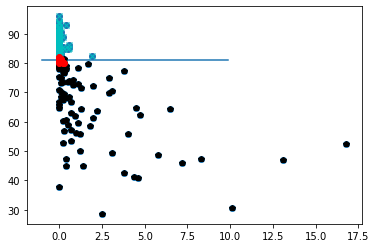

In [70]:
if __name__ == "__main__":
    # 获取特征和目标变量
    dataArr, labelArr = loadDataSet('testSetRBF.txt')
    # print labelArr

    # b是常量值， alphas是拉格朗日乘子
    b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)
    print('/n/n/n')
    print('b=', b)
    print('alphas[alphas>0]=', alphas[alphas > 0])
    print('shape(alphas[alphas > 0])=', shape(alphas[alphas > 0]))
    for i in range(100):
        if alphas[i] > 0:
            print(dataArr[i], labelArr[i])
    testRbf() 
    # 画图
    ws = calcWs(alphas, dataArr, labelArr)
    plotfig_SVM(dataArr, labelArr, ws, b, alphas)


关键结果

the training error rate is: 0.256410 

the test error rate is: 0.285714

b= [[-70.33820274]]

alphas[alphas>0]= [[0.6        0.22078796 0.6        0.6        0.6        0.6
  0.22078796 0.6        0.6        0.6        0.6        0.6       ]]

shape(alphas[alphas > 0])= (1, 12)



关键结果的解释：

以下是对输出结果的解释：

训练错误率是0.256410，表示在训练数据集上有25.64%的样本分类错误。
测试错误率是0.285714，表示在测试数据集上有28.57%的样本分类错误。
下面是相关的参数和结果：

常量项b的值为-70.33820274。
非零拉格朗日乘子alphas中大于零的值为：
[0.6, 0.22078796, 0.6, 0.6, 0.6, 0.6, 0.22078796, 0.6, 0.6, 0.6, 0.6, 0.6]
alphas中大于零值的形状为(1, 12)，表示有12个支持向量。
